# Seaborn
- Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
- https://seaborn.github.io/
- http://seaborn.pydata.org/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

# seaborn theme 설정
sns.set_style('darkgrid') # shift + tab 사용 방법, 정보 확인

# theme을 먼저 불러오고 한글 깨짐 방지는 나중에 설정
plt.rcParams['font.family'] = 'Malgun Gothic' # 글꼴
plt.rcParams['font.size'] = 11.0 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

In [2]:
# 데이타셋 로딩 : https://github.com/mwaskom/seaborn-data

# seaborn에서 제공하고 있는 dateSet: 버전마다 다를 수 있으니 확인하면 좋다
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
tips['sex'].unique(), tips['smoker'].unique(), tips['day'].unique(), tips['time'].unique()

(['Female', 'Male']
 Categories (2, object): ['Male', 'Female'],
 ['No', 'Yes']
 Categories (2, object): ['Yes', 'No'],
 ['Sun', 'Sat', 'Thur', 'Fri']
 Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun'],
 ['Dinner', 'Lunch']
 Categories (2, object): ['Lunch', 'Dinner'])

### histplot(); histogram
- sns.histplot(x=컬럼명, data=데이타프레임명)
- sns.histplot(데이타프레임명[컬럼명])

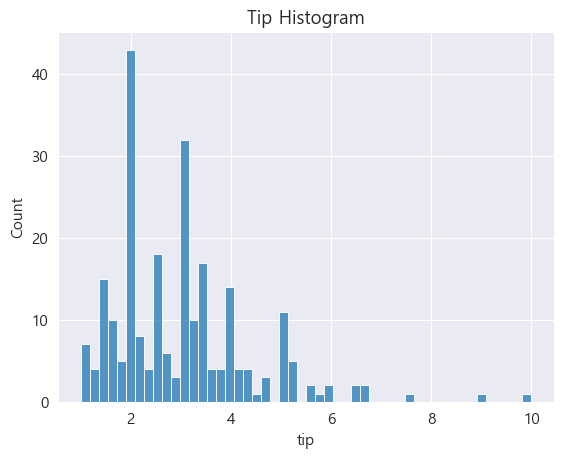

In [6]:
sns.histplot(x='tip', data=tips, bins=50)
plt.title('Tip Histogram')
plt.savefig('output/snsTipsHistogram.png')
plt.show()

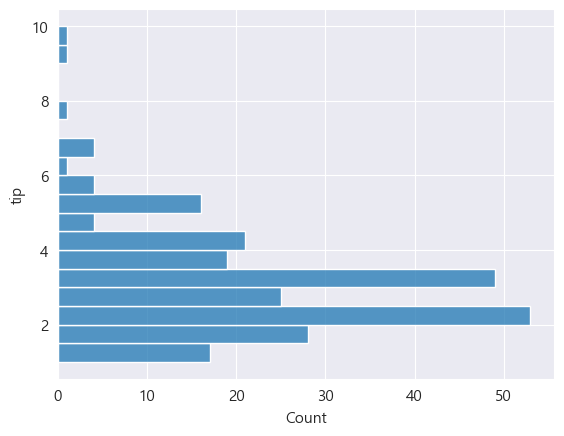

In [7]:
sns.histplot(y='tip', data=tips);

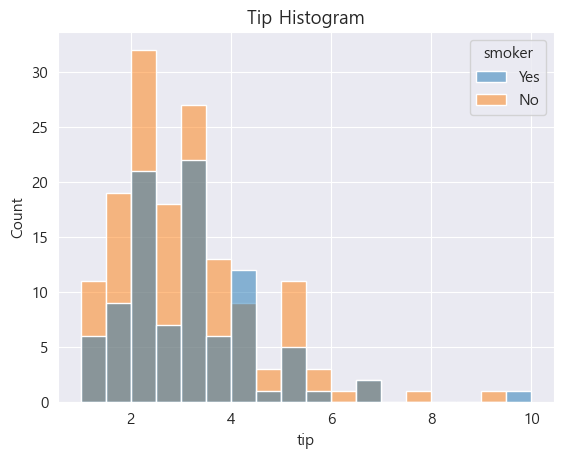

In [8]:
# 범주형(카테고리) 데이터 컬럼
# 성별 요일별 시간대별 흡연유무별; groupby 컬럼
# => hue='범주형 데이터 컬럼명'

# 흡연유무별
sns.histplot(x='tip', data=tips, hue='smoker')
plt.title('Tip Histogram')
plt.savefig('output/snsTipsHistogram.png')
plt.show()

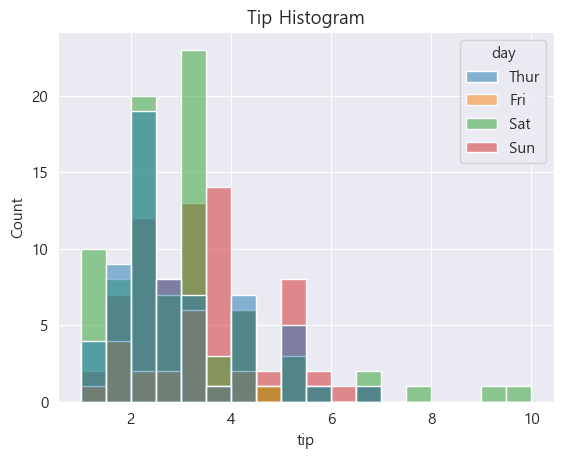

In [9]:
# 요일별

sns.histplot(x='tip', data=tips, hue='day')
plt.title('Tip Histogram')
plt.savefig('output/snsTipsHistogram.png')
plt.show()

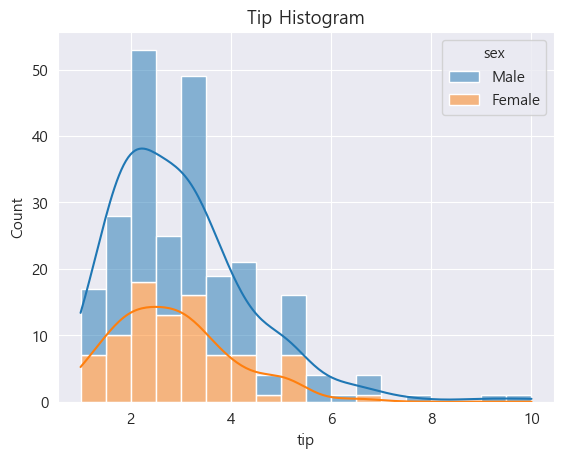

In [10]:
# plt.title('성별 팁 데이타 히스토그램 - 스택형')
# multiple 옵션; multiple='stack' => 겹치지 않고 쌓음
# ked 옵션; ked=True => 정규분포곡선 등의 그래프 추가
sns.histplot(x='tip', data=tips, hue='sex', multiple='stack', kde=True)
plt.title('Tip Histogram')
plt.savefig('output/snsTipsHistogram.png')
plt.show()

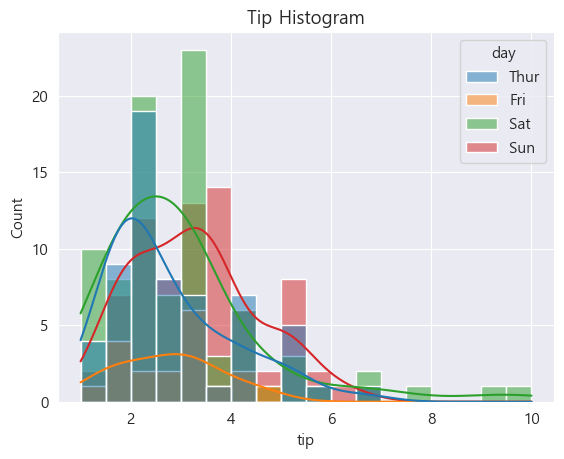

In [11]:
sns.histplot(x='tip', data=tips, hue='day', kde=True)
plt.title('Tip Histogram')
plt.savefig('output/snsTipsHistogram.png')
plt.show()

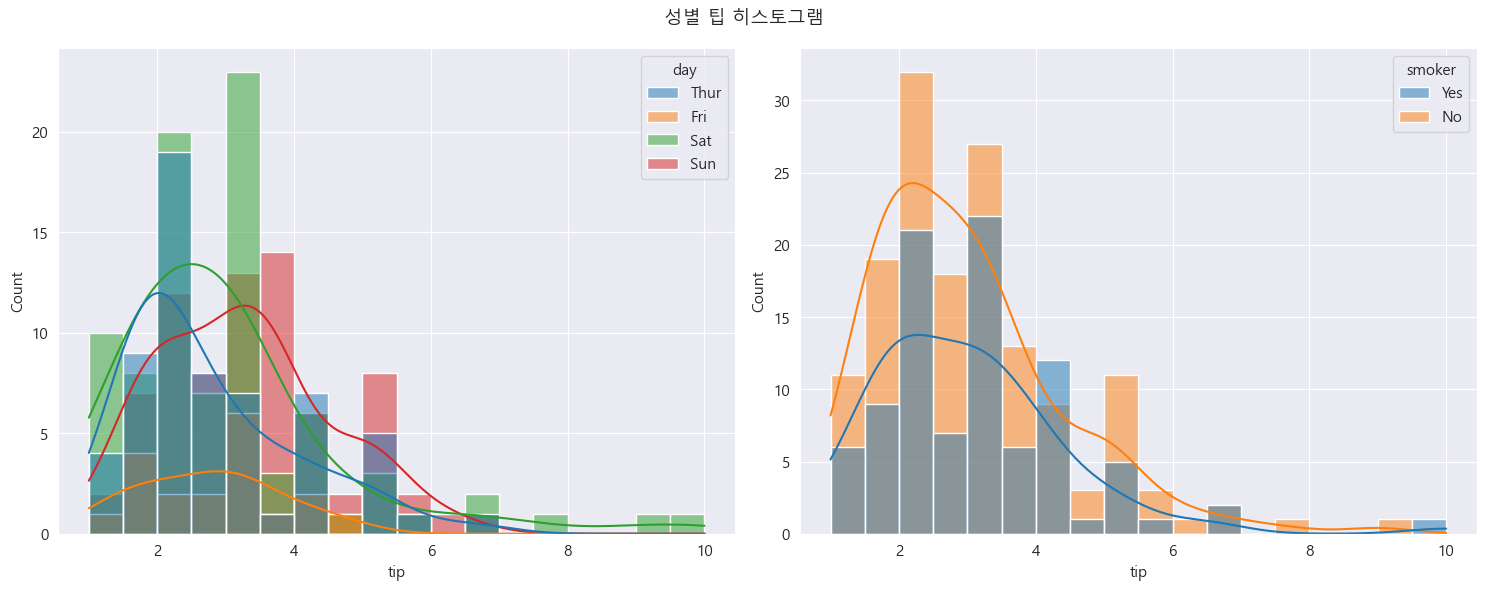

In [12]:
# 1행 2열 스타일로 배치

plt.figure(figsize=(15,6))

plt.subplot(121)
sns.histplot(x='tip', data=tips, hue='day', kde=True)

plt.subplot(122)
sns.histplot(x='tip', data=tips, hue='smoker', kde=True)

plt.suptitle('성별 팁 히스토그램')
plt.tight_layout()
plt.show()

### displot(); histogram
- sns.displot(x=컬럼명1, hue=컬럼명2, col|row =열기준컬럼명, kind='hist', data=데이타프레임명)

<Figure size 1000x800 with 0 Axes>

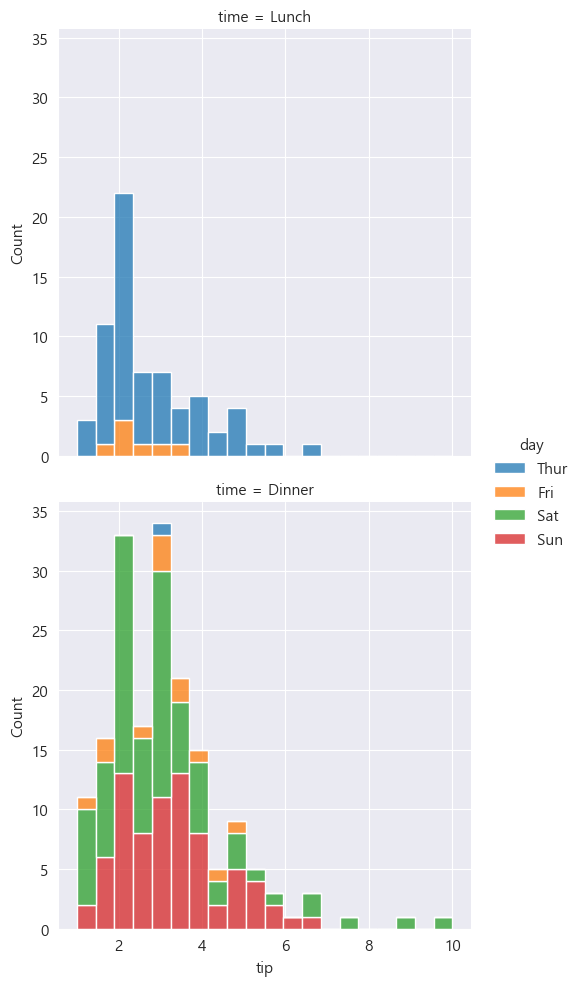

In [13]:
plt.figure(figsize=(10,8))
sns.displot(x='tip', bins=20, hue='day', row='time', kind='hist', multiple='stack', data=tips);

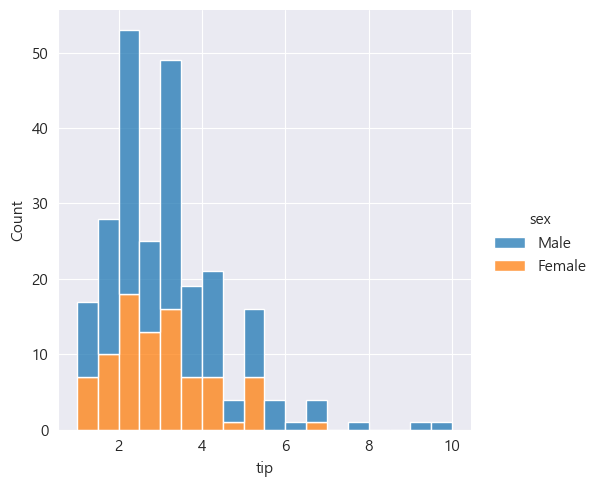

In [14]:
sns.displot(x='tip', hue='sex', kind='hist', multiple='stack',data=tips);

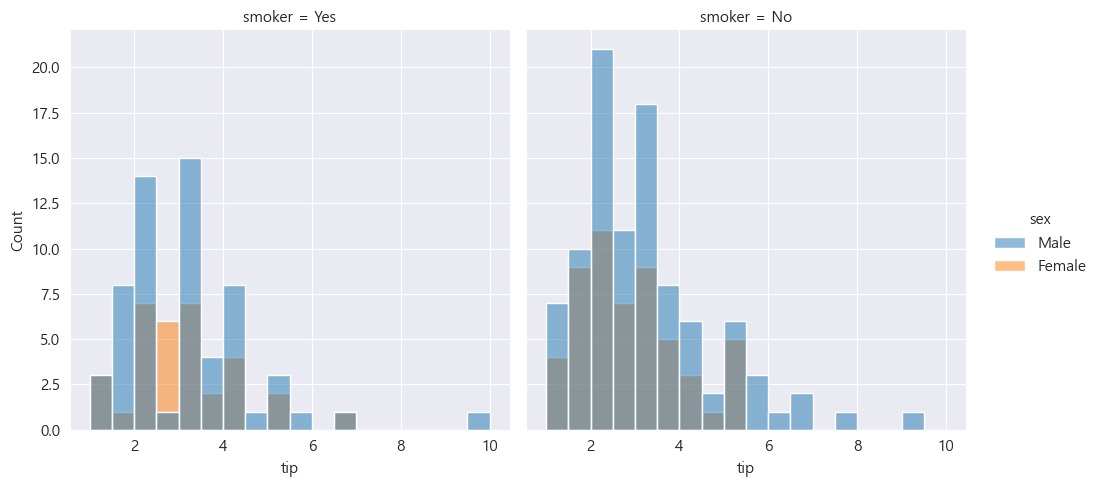

In [15]:
# 성별 팁 히스토그램 - 흡연자별 히스토그램 추가 (좌우배치)
sns.displot(x='tip', hue='sex', kind='hist', data=tips, col='smoker');

<Figure size 500x200 with 0 Axes>

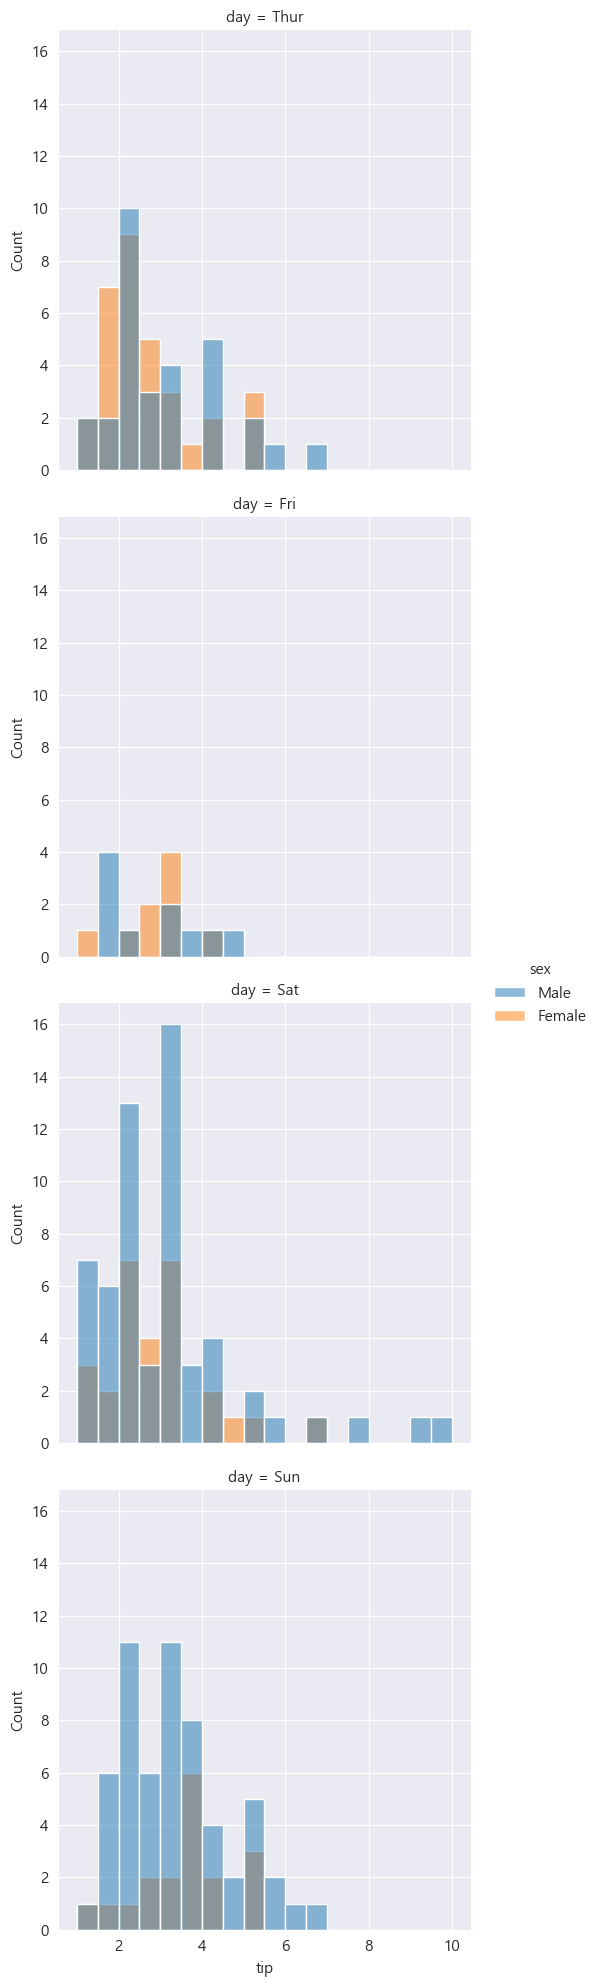

In [16]:
plt.figure(figsize=(5,2))
sns.displot(x='tip', hue='sex', kind='hist', data=tips, row='day');
plt.show()

In [17]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### countplot(); category type
- sns.countplot(x|y=컬럼명, data=데이타프레임명)
- 고유값을 가지는 데이터의 개수 등을 그래프로 표현할 때 사용

In [18]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

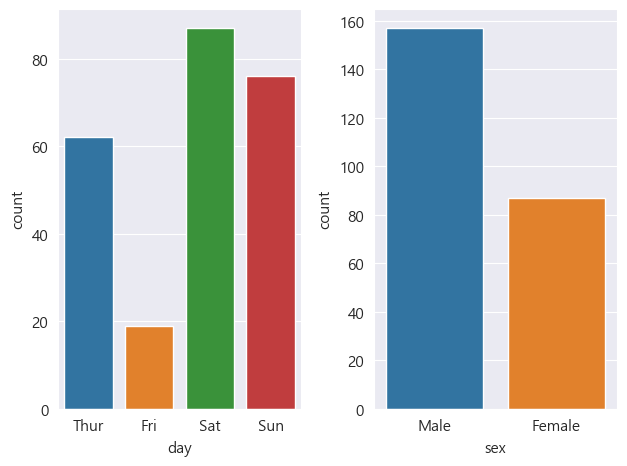

In [19]:
plt.subplot(121)
sns.countplot(x='day', data=tips)

plt.subplot(122)
sns.countplot(x='sex', data=tips)

plt.tight_layout()
plt.show()

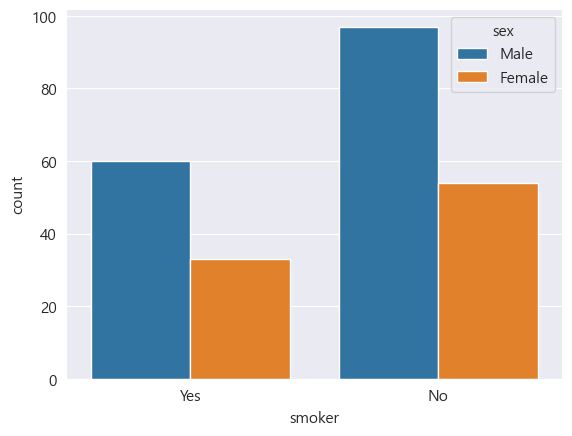

In [20]:
# hue 옵션 추가 
# 성별 흡연자와 비흡연자 빈도수
sns.countplot(x='smoker', data=tips, hue='sex');

### catplot() : 카운트
- countplot() 형태의 막대 그래프를 열과 행으로 배치
- sns.catplot(x|y=컬럼명1, hue=컬럼명2, col|row=컬럼명3 , data=데이타프레임명, kind='count’, height=높이)

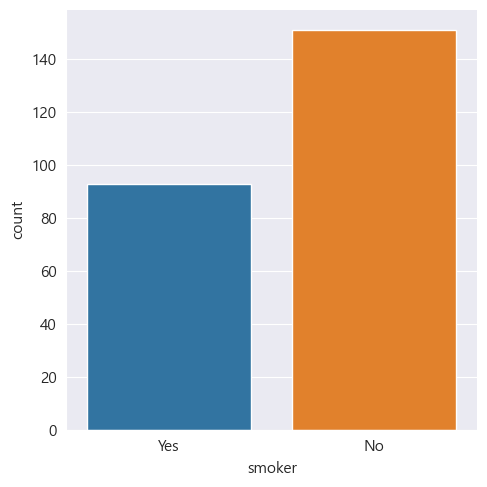

In [21]:
# 흡연유무에 따라 시각화
sns.catplot(x='smoker', kind='count', data=tips);

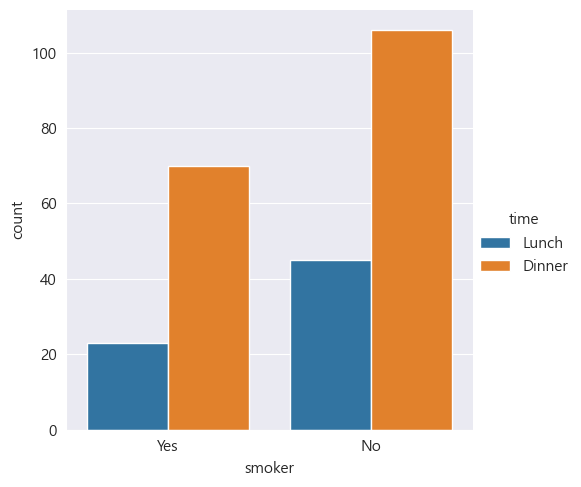

In [22]:
# 흡연유무 빈도수 시각화 (시간대별)
sns.catplot(x='smoker', kind='count', data=tips, hue='time');

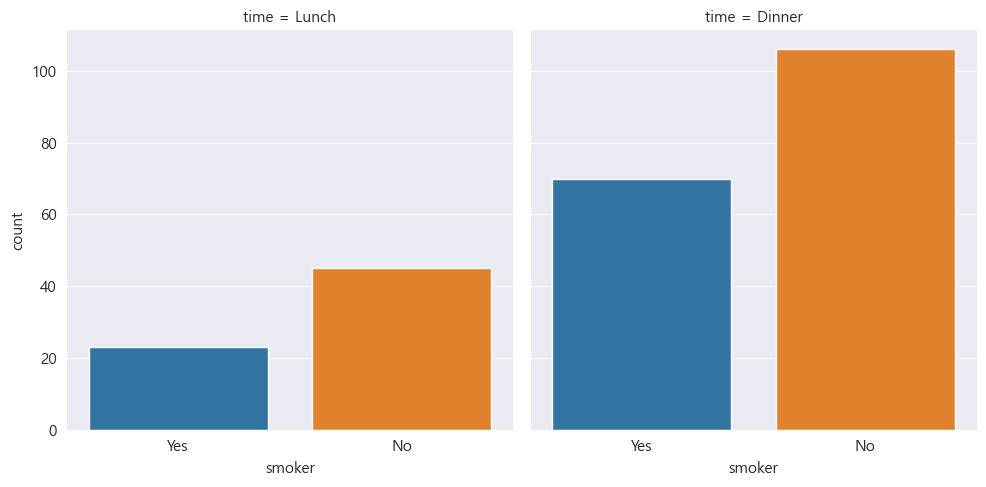

In [23]:
# 흡연유무 빈도수 시각화 (시간대별)
sns.catplot(x='smoker', kind='count', data=tips, col='time');

### scatterplot(); 산점도: 수치형의 x, y 두 개의 데이터 필요
- sns.scatterplot(x=컬럼명1, y=컬럼명2, data=데이타프레임명, hue=색상기준컬럼명, style=마커기준컬럼명, size=크기기준컬럼명, sizes=(low, high), alpha=투명도)
- 보통 상관관계를 볼 때 사용

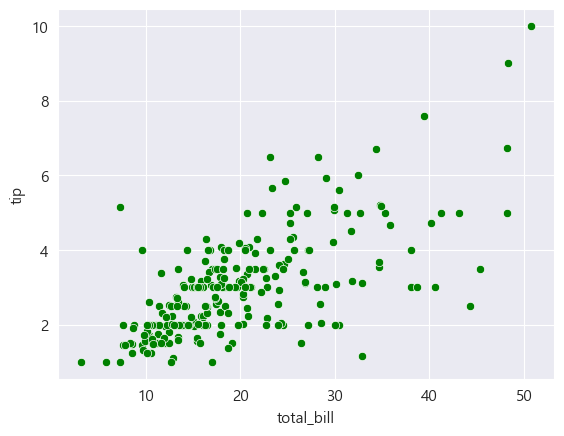

In [24]:
# 주문 금액과 팁의 관계를 산점도로 시각화
sns.scatterplot(x='total_bill', y='tip', data=tips, color='green');

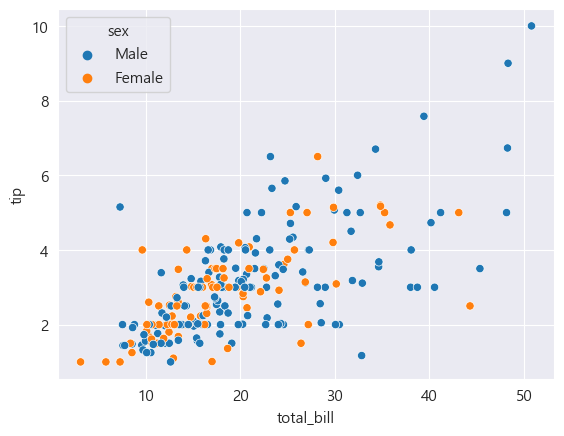

In [25]:
# 주문 금액과 팁의 관계를 산점도로 시각화
# 성별을 색상으로 표시
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex');

In [26]:
tips['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

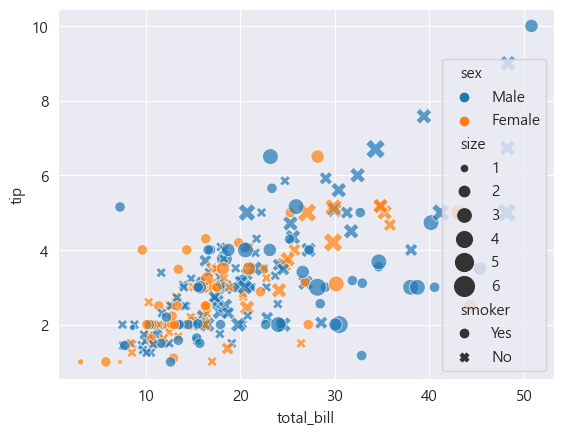

In [27]:
# 주문 금액과 팁의 관계를 산점도로 시각화
# 성별을 색상으로 표시, 마커의 모양은 흡연유무, alpha=#.# 마커의 불투명도 1이 완전 불투명(default), 마커의 크기는 주문갯수(size)로 표시
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex', style='smoker', alpha=0.7, size='size', sizes=(20, 200));

### relplot() : scatter
- sns.relplot(x=컬럼1, y=컬럼2, col|row=컬럼3, kind='scatter', data=데이타프레임명 hue=색상기준컬럼, style=마커표시기준컬럼)

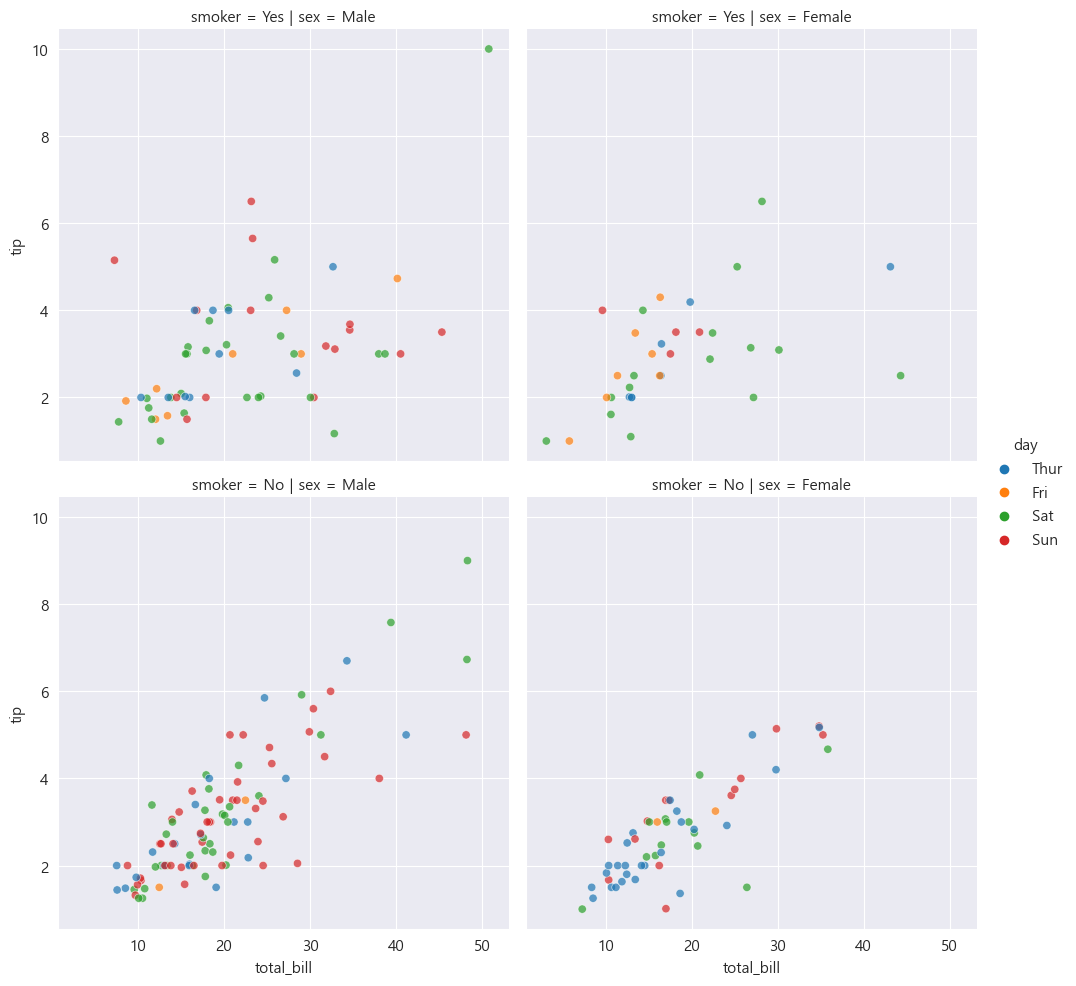

In [28]:
# 주문 금액과 팁의 관계를 산점도로 시각화
# 요일별 색상으로 표시
# 성별을 좌우로 배치
# 흡연유무는 상하로 배치
sns.relplot(kind='scatter', x='total_bill', y='tip', data=tips, color="orange", hue='day', col='sex', row='smoker', alpha=0.7)

### boxplot(); 상자 수염 그래프
- 최솟값, 1분위수, 중간값, 3분위수, 최댓값, 이상치를 표시
- 수치형 데이터와 카테고리 데이터 가능 sns.boxplot(x=컬럼명1, y=컬럼명2, data=데이타프레임)

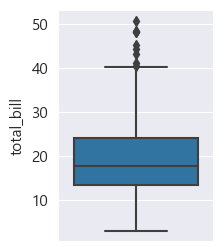

In [29]:
# 수치형 데이터의 박스 플롯
plt.figure(figsize=(2,3))
sns.boxplot(y='total_bill', data=tips)
plt.show()

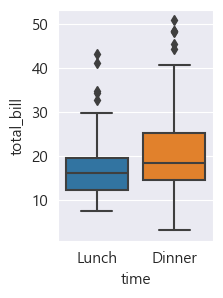

In [30]:
# 카테고리형과 수치형의 박스플롯
plt.figure(figsize=(2,3))
sns.boxplot(x='time', y='total_bill', data=tips);

<Axes: xlabel='total_bill', ylabel='time'>

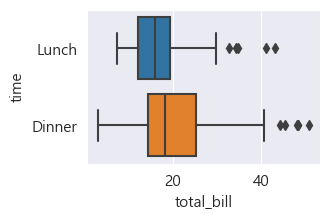

In [31]:
# 카테고리형과 수치형의 박스플롯
plt.figure(figsize=(3,2))
sns.boxplot(x='total_bill', y='time', data=tips)

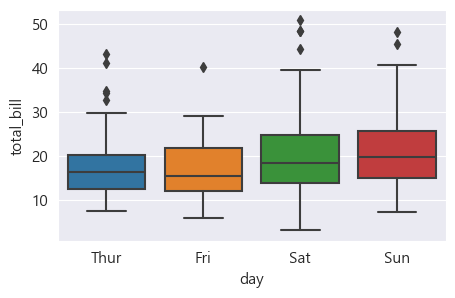

In [32]:
# 요일별 팁의 박스 플롯
plt.figure(figsize=(5,3))
sns.boxplot(x='day', y='total_bill', data=tips);

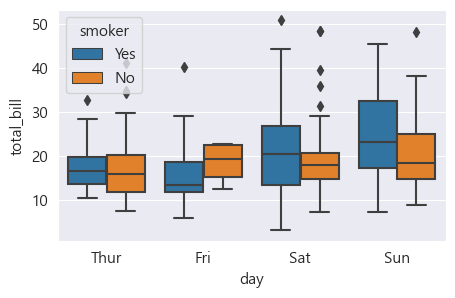

In [33]:
# 요일별 시간대별 팁의 박스 플롯
plt.figure(figsize=(5,3))
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker');

### violinplot(); 박스 플롯의 변형
- 박스플롯의 변형으로 데이터 분포 확인
- sns.violinplot(x=컬럼명1, y=컬럼명2, data=데이타프레임)

<Axes: ylabel='tip'>

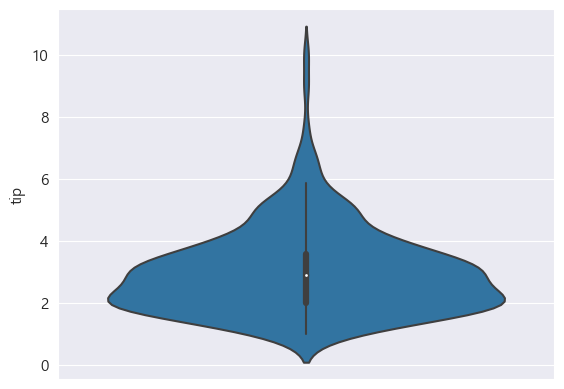

In [34]:
# 수치형 데이터 시각화
sns.violinplot(y='tip', data=tips)

<Axes: xlabel='time', ylabel='total_bill'>

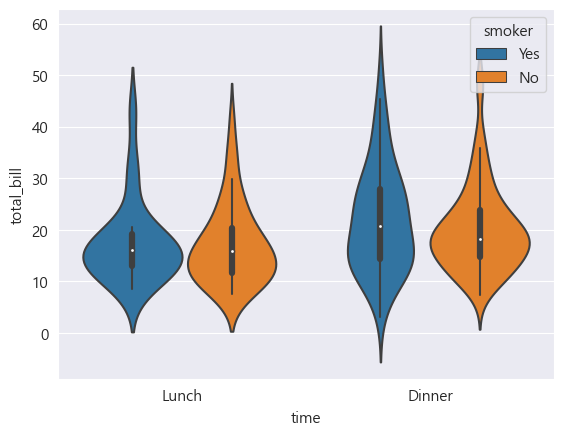

In [35]:
# 남녀별 팁 시간대별, 흡연유무별
sns.violinplot(x='time', y='total_bill', data=tips, hue='smoker')

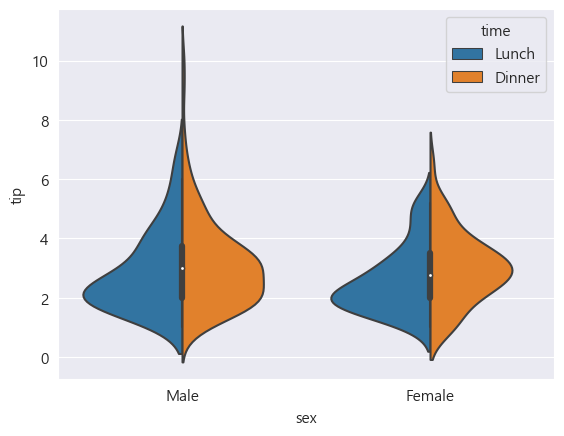

In [36]:
# 남녀 성별 + 점심 저녁 (split=True)
sns.violinplot(x='sex', y='tip', data=tips, hue='time', split=True);

### joinplot()
- 산점도+히스토그램
- sns.jointplot(x=컬럼명1, y=컬럼명2, data=데이타프레임, , alpha=투명도, , kind='hex')

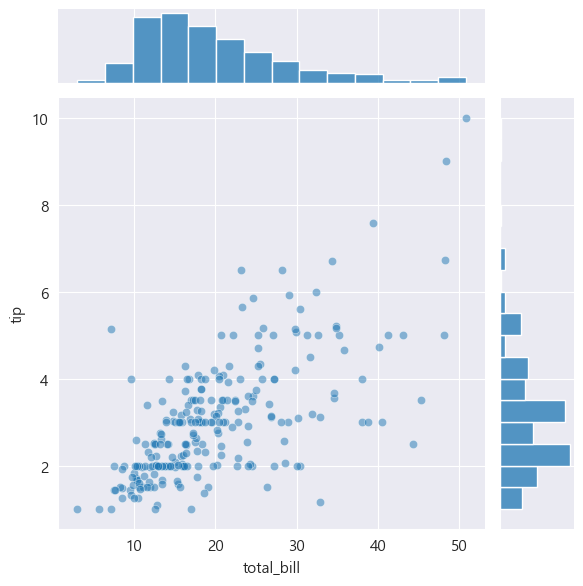

In [37]:
sns.jointplot(x='total_bill', y='tip', data=tips, alpha=0.5);

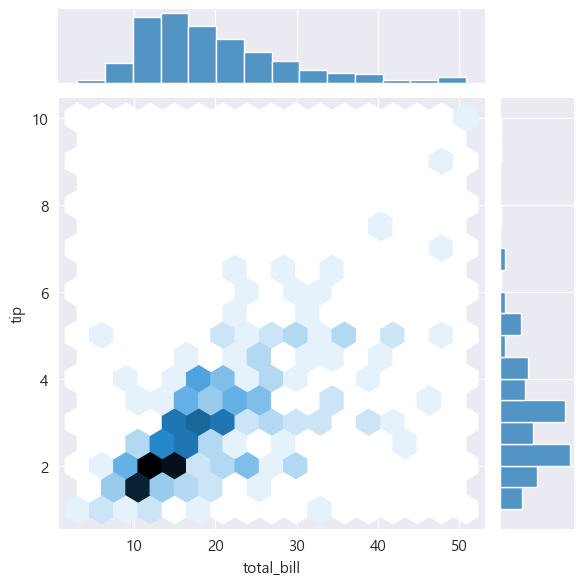

In [38]:
# kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
# plt.savefig('output/조인트플랏_팁과주문금액.png')
plt.show()

### heatmap()
- X축과 Y축의 데이타 수치와 비례하여 색깔을 다르게 해서 2차원으로 자료를 시각화하는데 사용한다.
- sns.heatmap(데이타프레임명, cmap=컬러맵명, annot=True))
- cmap (able to search "cmap pallette" on the internet)
    - viridis, plasma, inferno, magma, cividis
    - Greys, Purples, Blues, Greens, Oranges, Reds, YlOrBr, YlOrRd, OrRd, PuRd, RdPu, BuPu, GnBu, PuBu, YlGnBu, PuBuGn, BuGn, YlGn)
    - cmap colour reference: https://matplotlib.org/stable/tutorials/colors/colormaps.html

##### 상관계수
- 데이타프레임[[컬럼명1, 컬럼명2]].corr()

In [39]:
tips[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [40]:
round(tips[['total_bill', 'tip']].corr().loc['tip', 'total_bill'], 3)

0.676

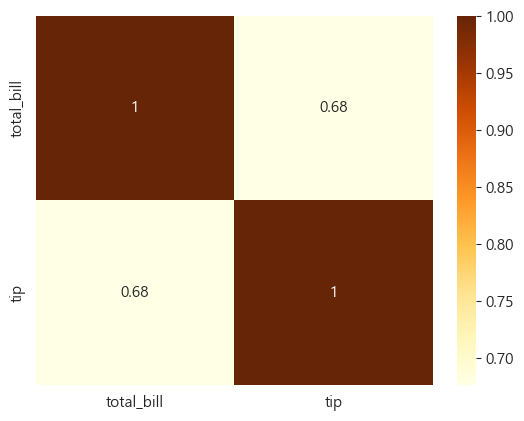

In [41]:
# 상관관계 데이터프레임을 히트맵으로 시각화
df_corr = tips[['total_bill', 'tip']].corr()
sns.heatmap(df_corr, cmap='YlOrBr', annot=True)
plt.show()

In [42]:
# 결측값 + heatmap()

titanic = sns.load_dataset('titanic')
titanic.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
279,1,3,female,35.0,1,1,20.2500,S,Third,woman,False,NaN,Southampton,yes,False
335,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [43]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

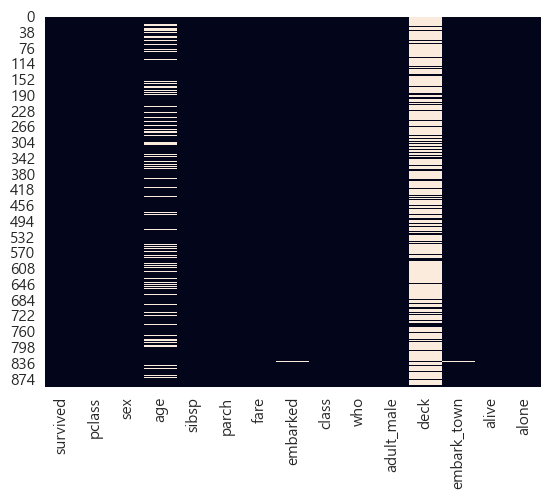

In [44]:
# 결측값을 히트맵으로 시각화
sns.heatmap(titanic.isnull(), cbar=False) # 밝게 칠해진 부분이 결측값, cbar = colour bar를 보이게 할건지 여부
plt.show()

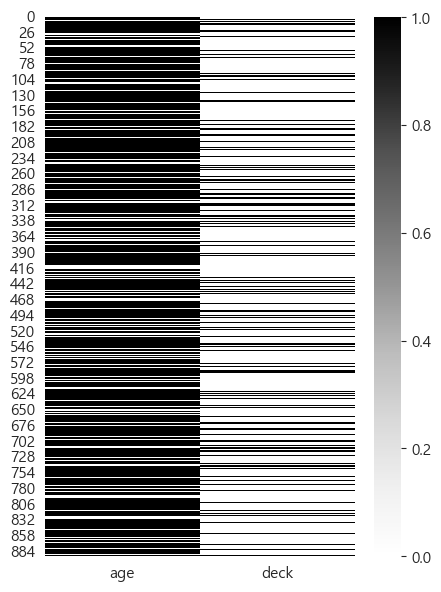

In [45]:
plt.figure(figsize=(5, 7))
sns.heatmap(titanic[['age', 'deck']].notnull(), cbar=True, cmap='Greys') # notnull이 True이므로 cmap='Greys'로 표현되어 어두운 색이 값이 있음
plt.show()

In [46]:
titanic['deck'].unique()
titanic.shape # 891개 중 688이 결측... 웬만하면 이런 건 버림

(891, 15)

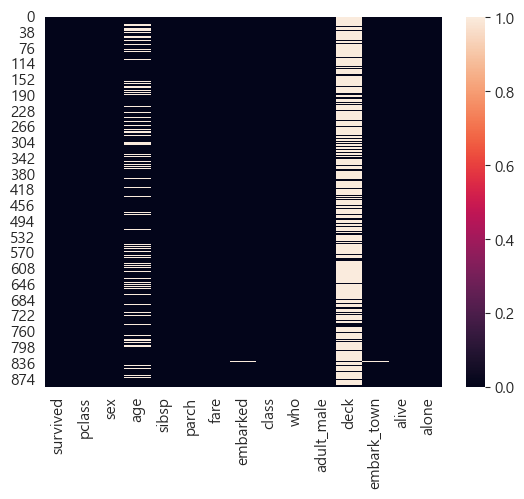

In [47]:
sns.heatmap(titanic.isnull())
plt.show()

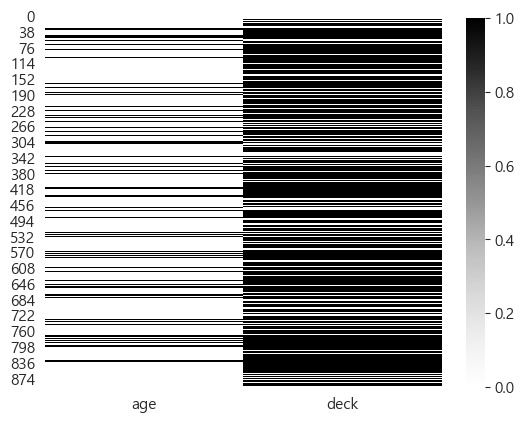

In [48]:
# age, deck 컬럼만 히트맵 시각화 => 검은색 부분이 결측; isnull() 사용
sns.heatmap(titanic[['age', 'deck']].isnull(), cmap='Greys')
plt.show()

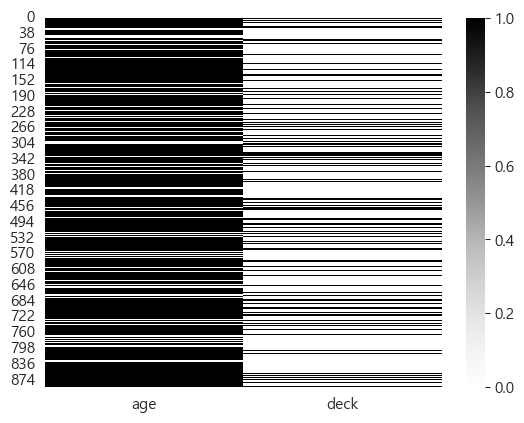

In [49]:
# age, deck 컬럼만 히트맵 시각화 => 흰색 부분이 결측; notnull() 사용
sns.heatmap(titanic[['age', 'deck']].notnull(), cmap='Greys')
plt.show()

### missingno
- 결측값 시각화에 사용
- pip install missingno

In [50]:
import missingno

In [52]:
print(help(missingno))
print()
print(dir(missingno))

Help on package missingno:

NAME
    missingno

PACKAGE CONTENTS
    _version
    missingno
    utils

VERSION
    0.5.2

FILE
    c:\users\gd\anaconda3\lib\site-packages\missingno\__init__.py


None

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_version', 'bar', 'dendrogram', 'heatmap', 'matrix', 'missingno', 'nullity_filter', 'nullity_sort', 'utils']


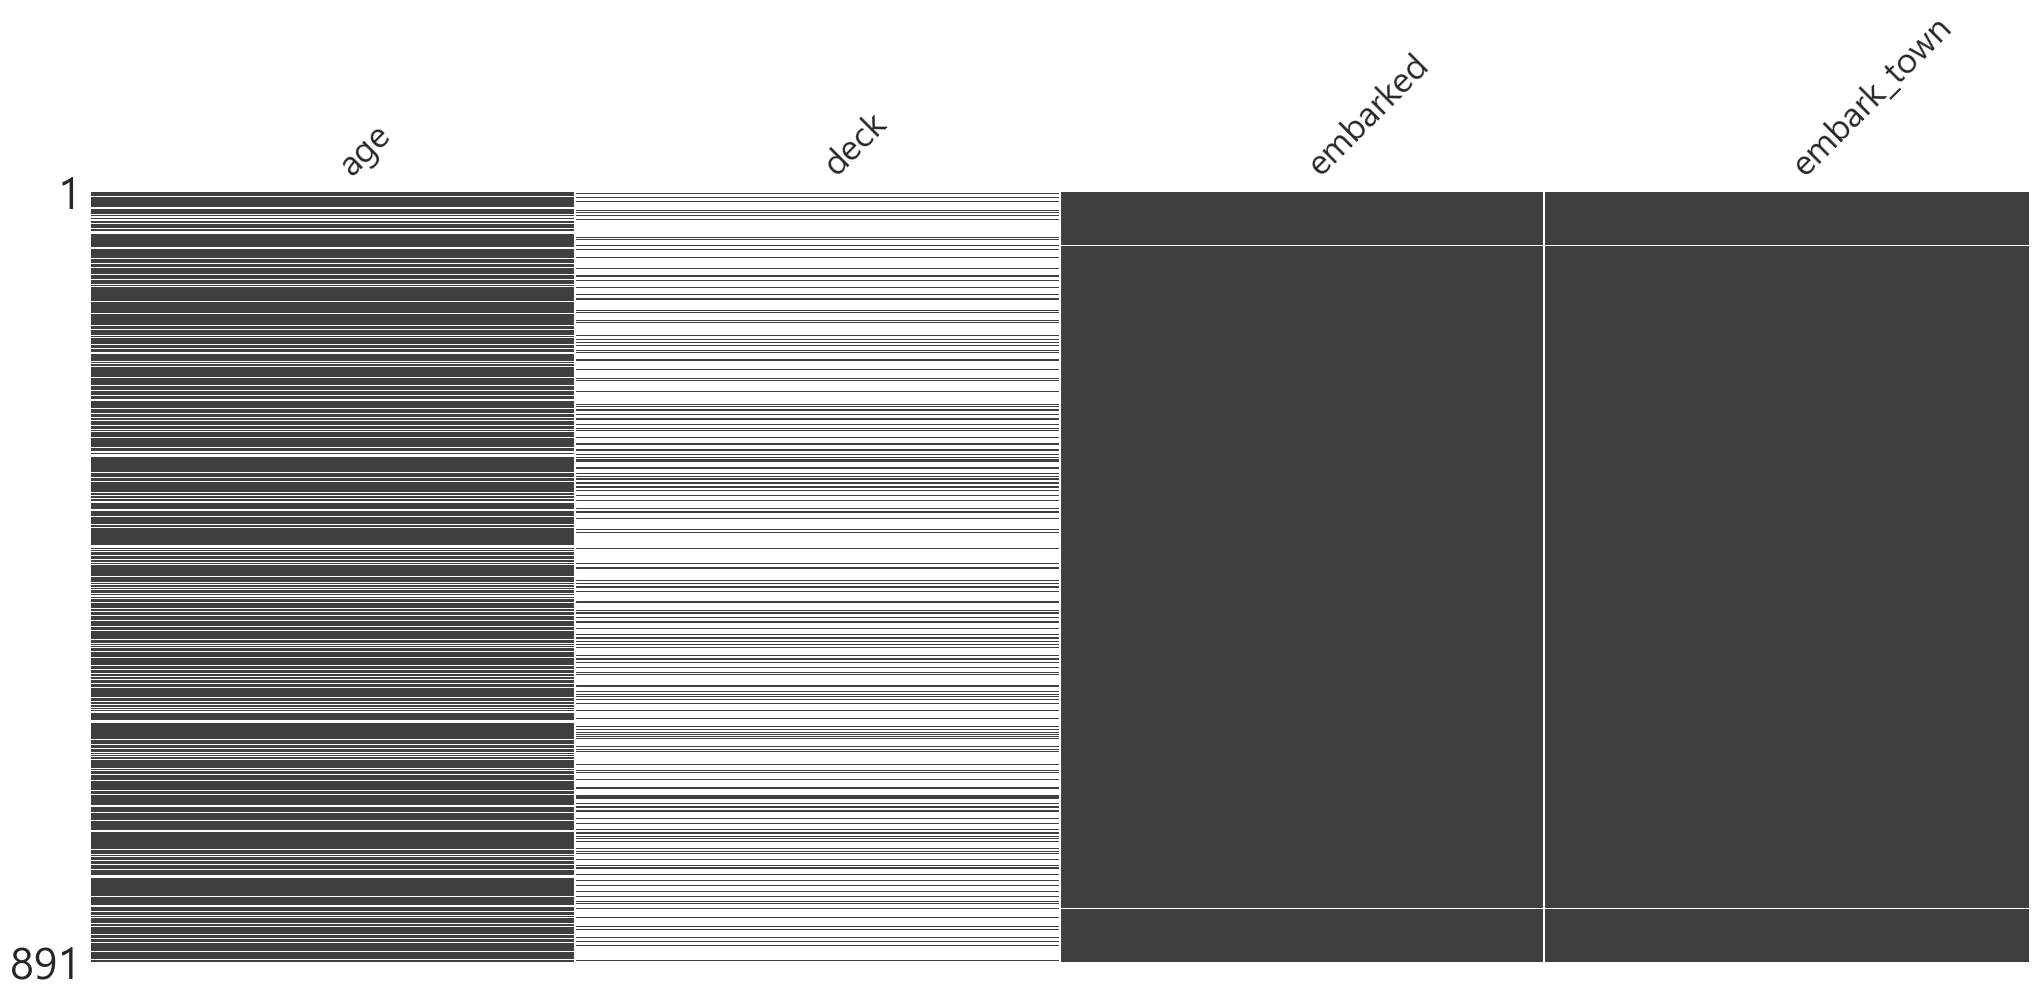

In [62]:
missingno.matrix(titanic[['age', 'deck', 'embarked', 'embark_town']], sparkline=False, fontsize=25);
# plt.show()